<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [81]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [52]:
data = pd.read_csv("game_of_thrones_train.csv", index_col="S.No")
data_test = pd.read_csv("game_of_thrones_test.csv", index_col="S.No")
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

<BarContainer object of 25 artists>

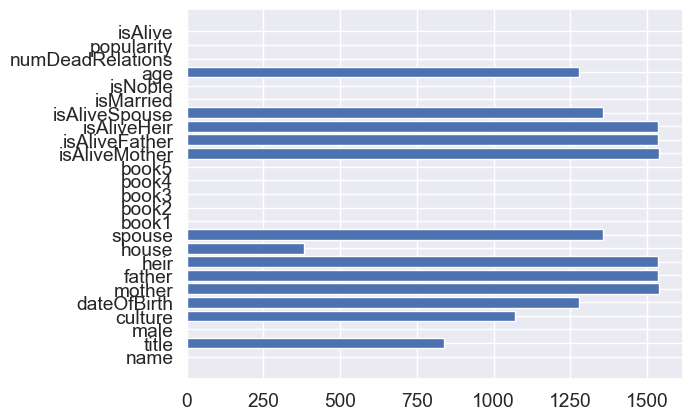

In [54]:
na = data.isna().sum(axis=0)

plt.barh(na.index, na.values)

<Axes: xlabel='S.No'>

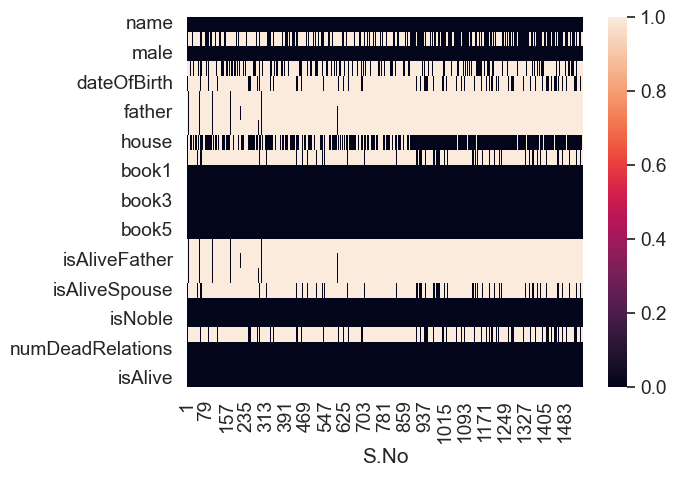

In [55]:
sns.heatmap(data.isna().transpose())

In [56]:
# Удалим столбцы mother, father, heir, spouse, isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse, title
# Вместо title есть столбец isNoble, который основан на title, наверно нам этого достаточнл
data.drop(columns=['mother','father','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse', 'title'], inplace = True)

Рассмотрим столбец culture

In [57]:
data['culture'].value_counts().head()

culture
Northmen     94
Ironborn     91
Free Folk    45
Braavosi     39
Valyrian     28
Name: count, dtype: int64

Не унимодален и категориальный, можно создать отдельную категорию unknown:

In [58]:
data['culture'].fillna('Unknown', inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_27808\3530091450.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['culture'].fillna('Unknown', inplace=True)


Рассмотрим dateOfBirth и age. По признаку age предсказывать целевую переменную удобнее и логичнее, поэтому оставим его, а dateOfBirth удалим, т.к. напрямую зависят друг от друга

In [59]:
data.drop(columns=['dateOfBirth'], inplace=True)

NaN в столбце age заменим медианой

In [60]:
median = data['age'].median()

data['age'].fillna(median, inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_27808\1395749797.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(median, inplace=True)


Остался house:

In [61]:
data['house'].value_counts()

house
House Frey          89
Night's Watch       88
House Stark         56
House Targaryen     40
House Lannister     36
                    ..
House Celtigar       1
House of Ghazeen     1
House Byrch          1
House Hawick         1
House Moore          1
Name: count, Length: 315, dtype: int64

Можно либо удалить признак, либо заменить NaN на unknown, т.к. NaN'ов немного

In [62]:
data['house'].fillna('unknown', inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_27808\346893088.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['house'].fillna('unknown', inplace=True)


<Axes: xlabel='S.No'>

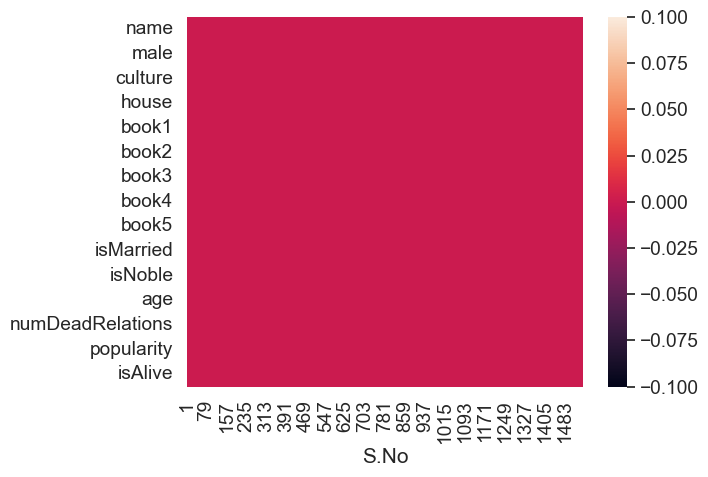

In [63]:
sns.heatmap(data.isna().transpose())

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [64]:
data['isPopular'] = (data.popularity >= 0.5)
data[['popularity','isPopular']]

,popularity,isPopular
S.No,,
1,0.605351,True
2,0.896321,True
3,0.267559,False
4,0.183946,False
5,0.043478,False
...,...,...
1553,0.160535,False
1554,0.040134,False
1555,0.076923,False


In [65]:
data['boolDeadRelations'] = (data['numDeadRelations'] > 0)
data[['boolDeadRelations', 'numDeadRelations']].sample(10)

,boolDeadRelations,numDeadRelations
S.No,,
796,False,0
688,False,0
53,False,0
85,True,3
703,False,0
672,False,0
945,False,0
1022,False,0
429,False,0


In [66]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [67]:
def find_cult(culture):
    for key, val in cult.items():
        if (culture in val):
            return key
    return culture
data['culture'] = data['culture'].apply(find_cult)
data['culture'].sample(10)

S.No
746      Unknown
1330     Unknown
1376     Unknown
1111    Northmen
600      Unknown
1302     Unknown
87      Valyrian
752      Unknown
1231     Unknown
437     Ironborn
Name: culture, dtype: object

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [68]:
data.columns

Index(['name', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isMarried', 'isNoble', 'age', 'numDeadRelations',
       'popularity', 'isAlive', 'isPopular', 'boolDeadRelations'],
      dtype='object')

In [69]:
data.drop(columns=['name', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'numDeadRelations', 'popularity'], inplace = True)

In [70]:
data.columns

Index(['male', 'culture', 'house', 'isNoble', 'age', 'isAlive', 'isPopular',
       'boolDeadRelations'],
      dtype='object')

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [71]:
data['isAlive'] # категориальная

S.No
1       0
2       1
3       1
4       0
5       1
       ..
1553    1
1554    0
1555    0
1556    1
1557    0
Name: isAlive, Length: 1557, dtype: int64

In [72]:
data['isAlive'].value_counts()

isAlive
1    1212
0     345
Name: count, dtype: int64

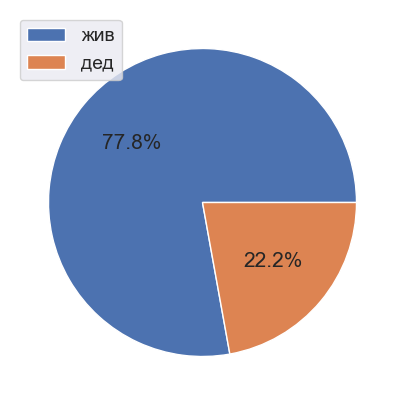

In [73]:
plt.figure(figsize=(8, 5))
plt.pie(data['isAlive'].value_counts(), autopct='%1.1f%%')
plt.legend(['жив', 'дед'])
plt.show()

Не сбалансирован по классам, выживших больше

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [74]:
data.head()

,male,culture,house,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,
1,1,Unknown,unknown,0,24.0,0,True,True
2,1,Rivermen,House Frey,1,97.0,1,True,True
3,1,Unknown,House Swyft,1,24.0,1,False,False
4,0,Unknown,House Arryn,1,23.0,0,False,False
5,0,Dornish,House Santagar,1,29.0,1,False,False


Сделаем из булевых признаков, признаки с 0 и 1:

In [75]:
bool_cols = ['isPopular', 'boolDeadRelations']
data[bool_cols] = data[bool_cols].astype(int)
data.head()

,male,culture,house,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,
1,1,Unknown,unknown,0,24.0,0,1,1
2,1,Rivermen,House Frey,1,97.0,1,1,1
3,1,Unknown,House Swyft,1,24.0,1,0,0
4,0,Unknown,House Arryn,1,23.0,0,0,0
5,0,Dornish,House Santagar,1,29.0,1,0,0


Категориальные нечисловые признаки: title, culture, house
Так как возможных значений много у этих столбцов, при one-hot-encoding будет очень много столбцов, используем frequency encoding

In [76]:
data['culture'].value_counts()

culture
Unknown                    1069
Northmen                    103
Ironborn                     91
Free Folk                    46
Braavosi                     39
Valyrian                     28
Ghiscari                     17
Dornish                      17
Dothraki                     17
Reach                        13
Vale mountain clans          12
Rivermen                     10
Valemen                      10
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Westermen                     5
Summer Isles                  4
Stormlands                    4
Astapori                      4
Northern mountain clans       3
Dornishmen                    3
Westeros                      3
Ironmen                       3
First Men                     2
Meereenese                    2
Crannogmen                    2
Lysene                        2
Myrish                        2
Sistermen                     2


In [77]:
culture_freq = data['culture'].value_counts(normalize=True)
data['culture_freq'] = data['culture'].map(culture_freq)
data.drop(columns='culture', inplace=True)
data['culture_freq']

S.No
1       0.686577
2       0.006423
3       0.686577
4       0.686577
5       0.010918
          ...   
1553    0.686577
1554    0.686577
1555    0.686577
1556    0.001285
1557    0.686577
Name: culture_freq, Length: 1557, dtype: float64

In [78]:
data['house'].value_counts()

house
unknown             381
House Frey           89
Night's Watch        88
House Stark          56
House Targaryen      40
                   ... 
House Celtigar        1
House of Ghazeen      1
House Byrch           1
House Hawick          1
House Moore           1
Name: count, Length: 316, dtype: int64

In [79]:
house_freq = data['house'].value_counts(normalize=True)
data['house_freq'] = data['house'].map(house_freq)
data.drop(columns='house', inplace=True)
data['house_freq']

S.No
1       0.244701
2       0.057161
3       0.004496
4       0.007065
5       0.001285
          ...   
1553    0.244701
1554    0.244701
1555    0.004496
1556    0.001285
1557    0.001285
Name: house_freq, Length: 1557, dtype: float64

### Анализ корреляции целевой переменной и признаков

Все возможные графики распределений всех признаков между собой

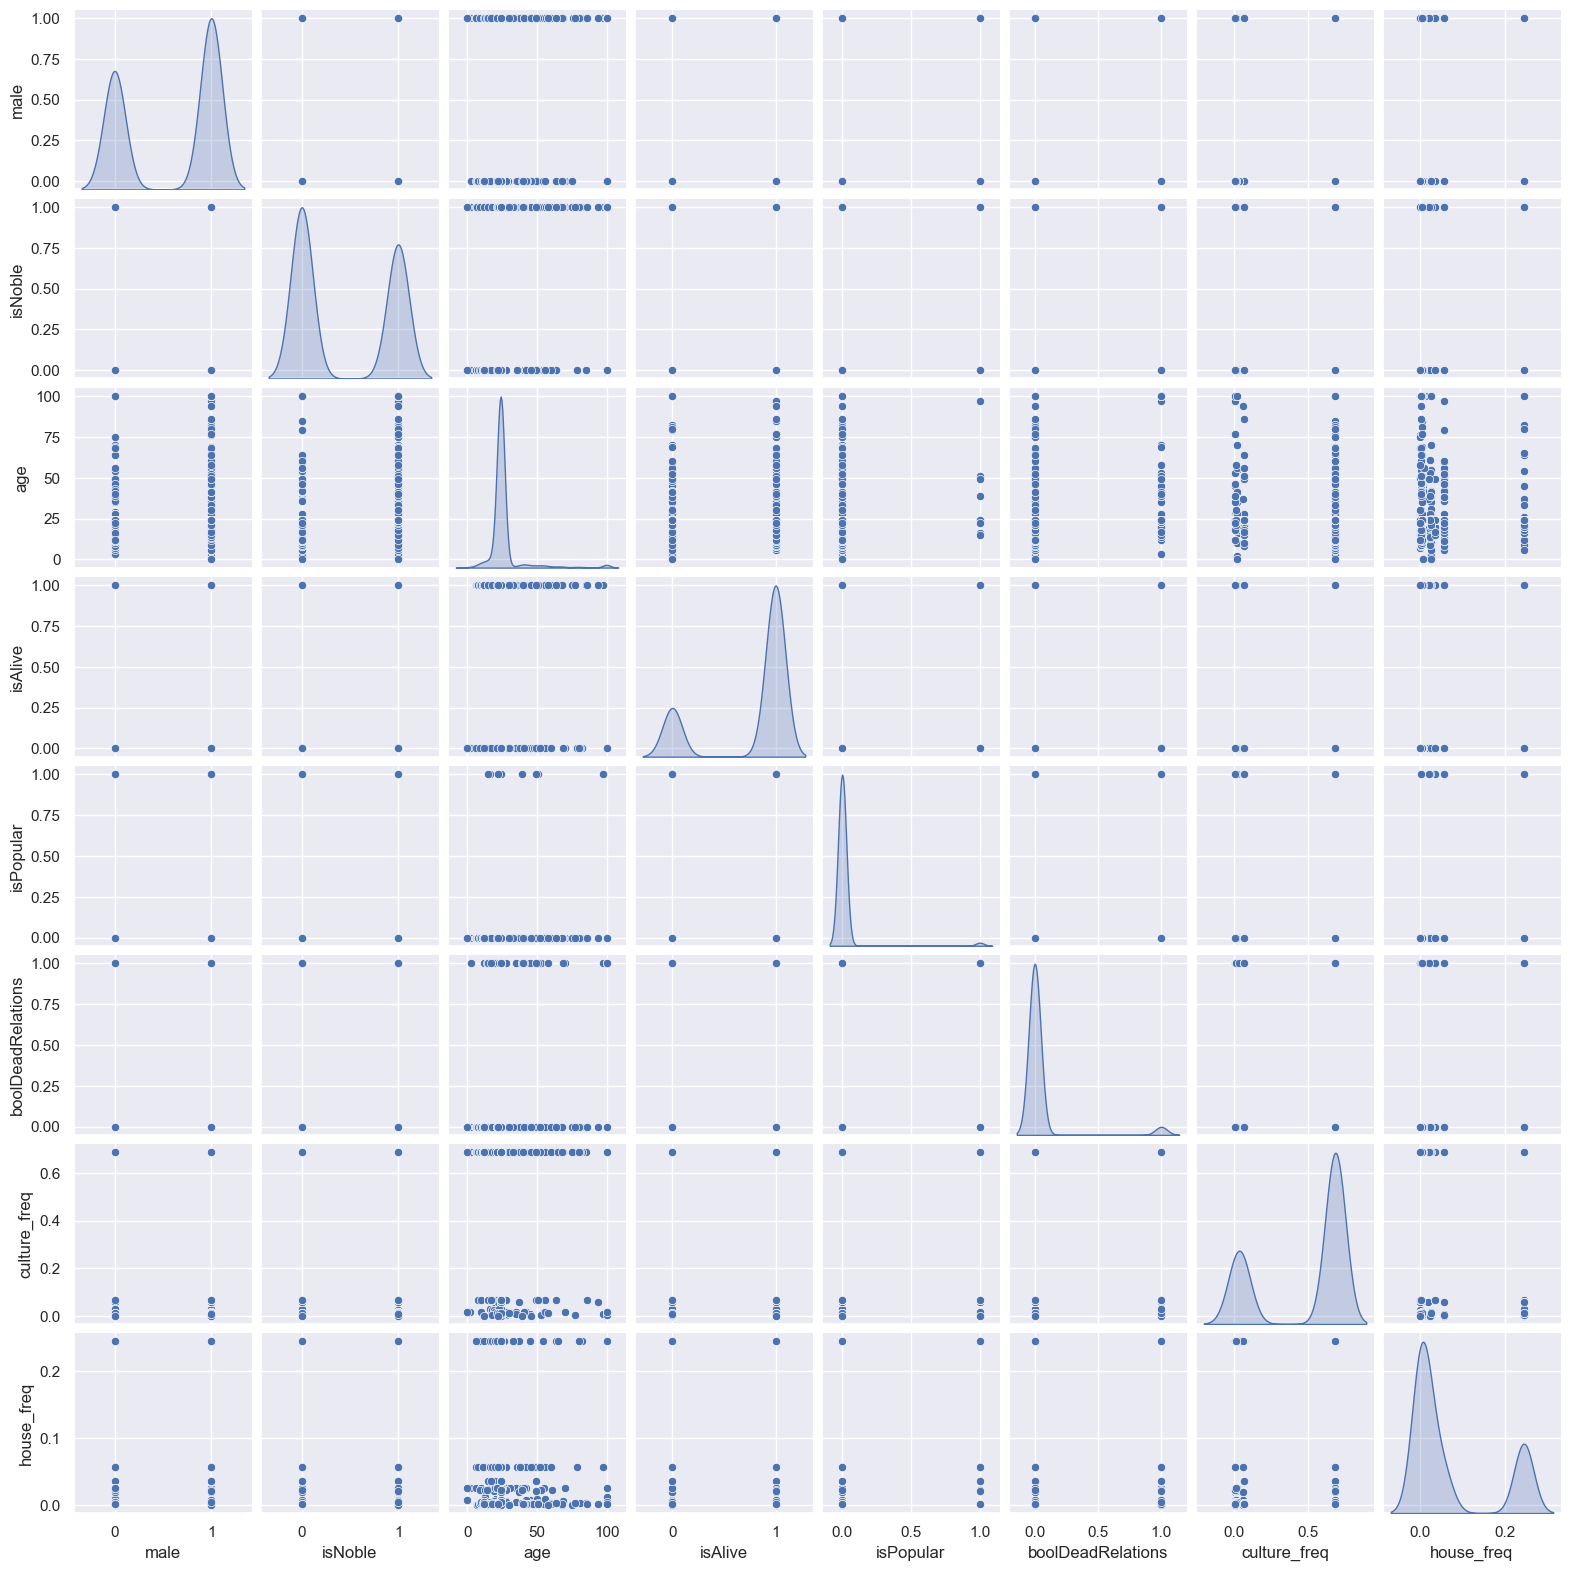

In [80]:
sns.set()
sns.pairplot(data, height=2, kind='scatter', diag_kind='kde')
plt.show()

Матрица корреляции:

<Axes: >

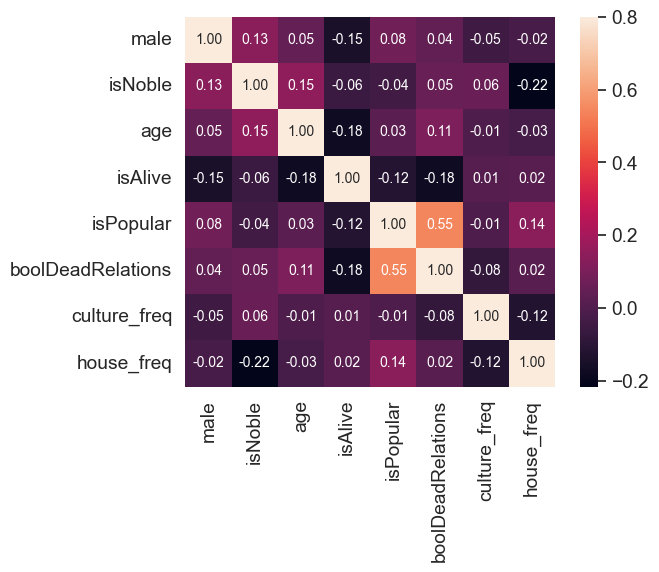

In [ ]:
correlation_matrix = data.corr()
sns.set(font_scale=1.25)
sns.heatmap(correlation_matrix, vmax=.8, annot=True, annot_kws={'size':10}, fmt='.2f', square=True)

- isPopular коррелирует наполовину с boolDeadRelations. ну надеюсь что это не очень критично
- максимальная корреляция с целевой переменной это у house_freq, но она мелкая: 0.02, что наверное грустно, крутой зависимости с целевой переменной не замечается

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Возникают сначала несколько вопросов:
1. Как пол влияет на жизнь в данном сериале
2. как знатность isNoble влияет на жизнь там
3. Как популярити влияет на жизнь
4. Как возраст влияет на жизнь
5. Как отношения с мертвыми влияют на жизнь boolDeadRelations
6. ну и посмотрим на house_freq

Рассмотрим сначала вопросы 1, 2, 3, 5
В них значения либо 0 либо 1

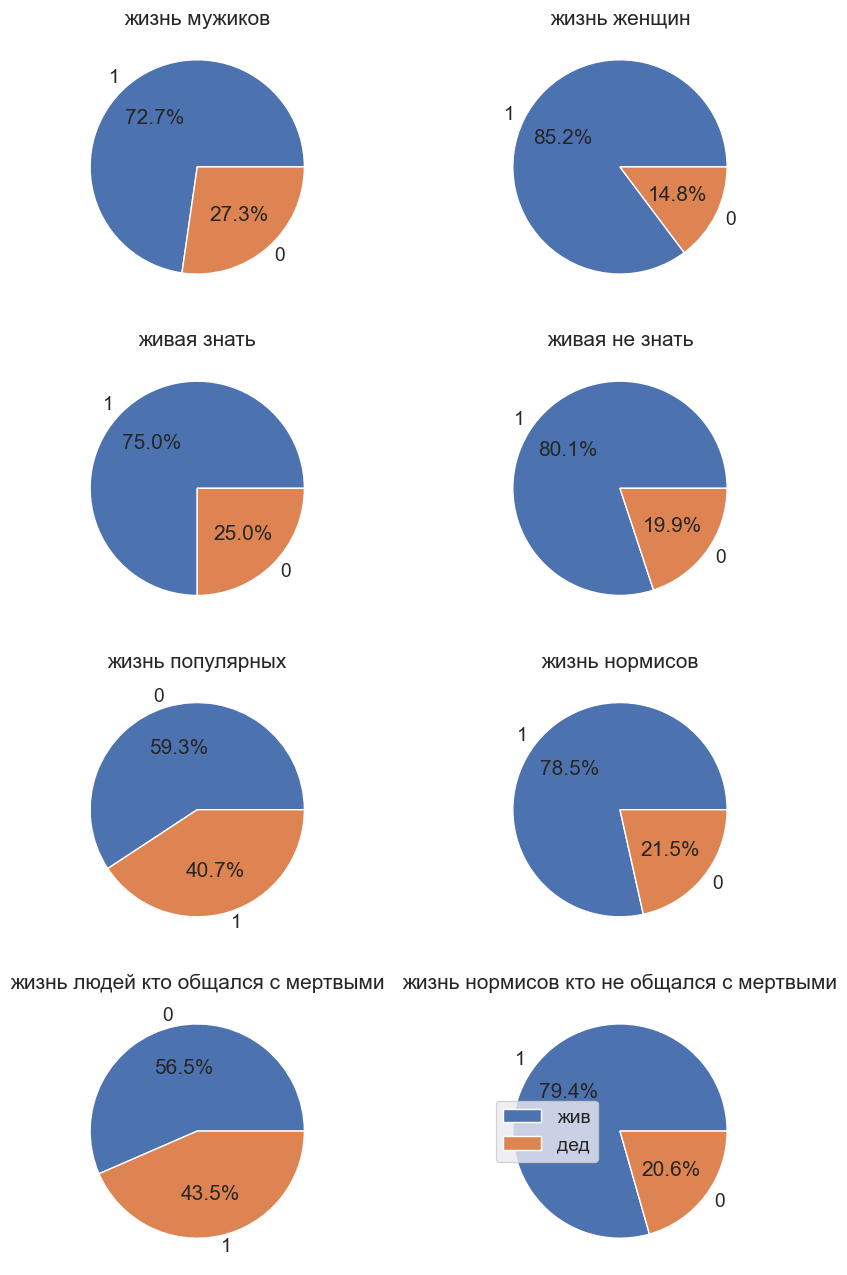

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(10,16))

# пол

data_males = data[data['male'] == 1]['isAlive'].value_counts()
data_not_males = data[data['male'] == 0]['isAlive'].value_counts()

axes[0,0].pie(data_males, labels=data_males.index, autopct='%1.1f%%')
axes[0,1].pie(data_not_males, labels=data_not_males.index, autopct='%1.1f%%')

axes[0,0].set_title('жизнь мужиков')
axes[0,1].set_title('жизнь женщин')

# знать

data_noble = data[data['isNoble'] == 1]['isAlive'].value_counts()
data_not_noble = data[data['isNoble'] == 0]['isAlive'].value_counts()

axes[1,0].pie(data_noble, labels=data_noble.index, autopct='%1.1f%%')
axes[1,1].pie(data_not_noble, labels=data_not_noble.index, autopct='%1.1f%%')

axes[1,0].set_title('живая знать')
axes[1,1].set_title('живая не знать')

# популярность

data_pop = data[data['isPopular'] == 1]['isAlive'].value_counts()
data_not_pop = data[data['isPopular'] == 0]['isAlive'].value_counts()

axes[2,0].pie(data_pop, labels=data_pop.index, autopct='%1.1f%%')
axes[2,1].pie(data_not_pop, labels=data_not_pop.index, autopct='%1.1f%%')

axes[2,0].set_title('жизнь популярных')
axes[2,1].set_title('жизнь нормисов')

# отношения с мертвыми

data_deadrel = data[data['boolDeadRelations'] == 1]['isAlive'].value_counts()
data_not_deadrel = data[data['boolDeadRelations'] == 0]['isAlive'].value_counts()

axes[3,0].pie(data_deadrel, labels=data_deadrel.index, autopct='%1.1f%%')
axes[3,1].pie(data_not_deadrel, labels=data_not_deadrel.index, autopct='%1.1f%%')

axes[3,0].set_title('жизнь людей кто общался с мертвыми')
axes[3,1].set_title('жизнь нормисов кто не общался с мертвыми')


plt.legend(['жив', 'дед'])

plt.show()

1. Мужчины больше умирали на 13%
2. Знать больше умирали на 6%, неочень много
3. Популярные люди намного чаще умирали на 20%
4. Жизнь людей кто как-то соотносился к мертвым, умирали чаще на 23%

Проверим age:

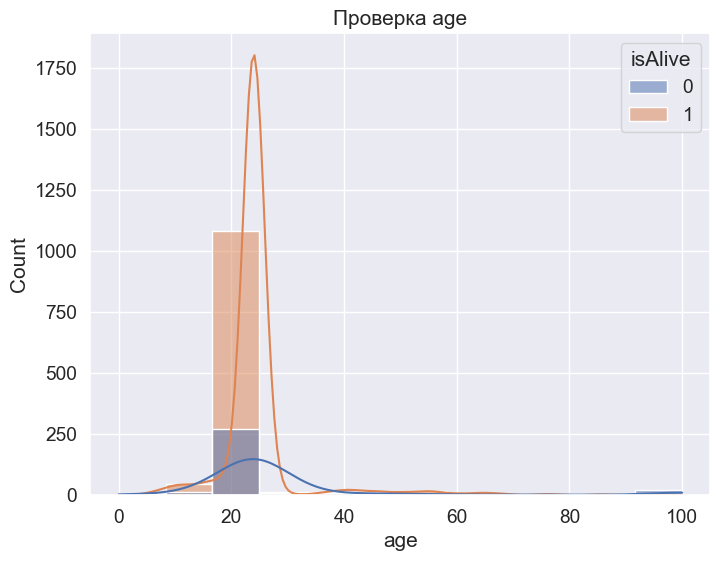

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Проверка age")
sns.histplot(data=data, x='age', kde=True, hue='isAlive')
plt.show()

Очень мало в целом людей, которые были вне возраста 20-30. Соответственно умирали чаще в таком возрасте
Посмотрим также для house_freq

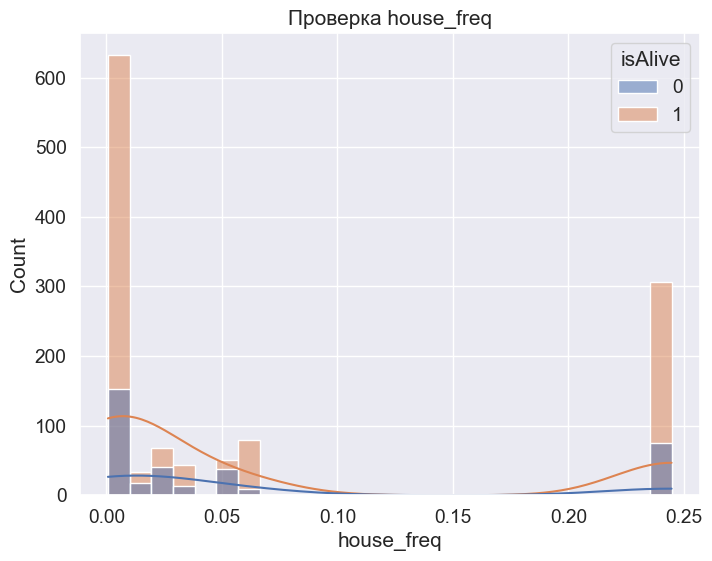

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Проверка house_freq")
sns.histplot(data=data, x='house_freq', kde=True, hue='isAlive')
plt.show()

Люди с частыми домами умирали меньше в целом, чем люди с уникальными домами 

## Сделаем пайплайн

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd

In [ ]:
# трансформер для обработки культуры
class CultureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cult):
        self.cult = cult

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['culture'] = X['culture'].fillna('Unknown')
        X['culture'] = X['culture'].apply(self._find_cult)
        culture_freq = X['culture'].value_counts(normalize=True)
        X['culture_freq'] = X['culture'].map(culture_freq)
        X.drop(columns=['culture'], inplace=True)
        return X

    def _find_cult(self, culture):
        for key, val in self.cult.items():
            if culture in val:
                return key
        return culture


In [ ]:

# словарь культур
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}


In [ ]:

# трансформер для обработки данных
class CustomTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.median_age = X['age'].median()  # Считаем медиану для возраста
        return self

    def transform(self, X):
        X = X.copy()
        
        # Новые признаки
        X['isPopular'] = (X['popularity'] >= 0.5).astype(int)
        X['boolDeadRelations'] = (X['numDeadRelations'] > 0).astype(int)

        # Удаление ненужных столбцов
        drop_columns = [
            'mother', 'father', 'heir', 'spouse', 'isAliveMother', 
            'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'title', 
            'dateOfBirth', 'name', 'book1', 'book2', 'book3', 'book4', 
            'book5', 'isMarried', 'numDeadRelations', 'popularity'
        ]
        X.drop(columns=drop_columns, inplace=True)
        
        # Заполнение пропусков
        X['age'].fillna(self.median_age, inplace=True)
        X['house'].fillna('unknown', inplace=True)
        
        # Обработка house
        house_freq = X['house'].value_counts(normalize=True)
        X['house_freq'] = X['house'].map(house_freq)
        X.drop(columns=['house'], inplace=True)
        
        return X


In [ ]:
pipeline = Pipeline([
    ('culture_processing', CultureTransformer(cult=cult)),
    ('custom_processing', CustomTransformer())
])


In [85]:

# используем для data_test потому что лень было вписывать всё вместе с data
processed_data_test = pipeline.fit_transform(data_test)


C:\Users\MSI\AppData\Local\Temp\ipykernel_27808\3033957611.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(self.median_age, inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_27808\3033957611.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values
# X_test понадобится в конце для файла submission
X_test = processed_data_test.values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [92]:
from sklearn.model_selection import train_test_split

In [ ]:
# на train части обучаем, на val части проверяем смотрим какой score, на test части не знаем ответы, поэтому просто
# делаем файл submission и отправляем в степик
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [43]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [44]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_val)

(312,)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [95]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier()
random_forest = RandomForestClassifier()
gaussian_process = GaussianProcessClassifier()
naive_bayes = GaussianNB()
k_neighbors = KNeighborsClassifier()
svc = SVC()
decision_tree = DecisionTreeClassifier()

models = [
    ("AdaBoost", ada_boost),
    ("RandomForest", random_forest),
    ("GaussianProcess", gaussian_process),
    ("NaiveBayes", naive_bayes),
    ("KNeighbors", k_neighbors),
    ("SVC", svc),
    ("DecisionTree", decision_tree),
]

# Шаг 2. обучение модели
for name, model in models:
    model.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_preds = {}
for name, model in models:
    y_preds[name] = model.predict(X_val)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [96]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [97]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8333


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [98]:
# Шаг 3. Предсказание на тестовых данных
y_preds
#models = [
#     ("AdaBoost", ada_boost),
#     ("RandomForest", random_forest),
#     ("GaussianProcess", gaussian_process),
#     ("NaiveBayes", naive_bayes),
#     ("KNeighbors", k_neighbors),
#     ("SVC", svc),
#     ("DecisionTree", decision_tree),
# ]

# Шаг 4. Оценка предсказания по метрике accuracy

for (name, model) in models:
    accuracy = accuracy_score(y_val, y_preds[name])
    print("Accuracy of model %s: %.4f" % (name,accuracy))

Accuracy of model AdaBoost: 0.8365
Accuracy of model RandomForest: 0.7885
Accuracy of model GaussianProcess: 0.8462
Accuracy of model NaiveBayes: 0.8237
Accuracy of model KNeighbors: 0.7885
Accuracy of model SVC: 0.8397
Accuracy of model DecisionTree: 0.7821


In [101]:
best_model = gaussian_process

Самая лучшая модель: GaussianProcess, точность 0.8462

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [51]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [102]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [106]:
y_pred_test = best_model.predict(X_test)

In [107]:
assert len(submission) == len(y_pred_test), "Размеры submission и y_pred_test не совпадают!"

In [108]:
submission['isAlive'] = y_pred_test
submission.sample(3)

,isAlive
S.No,
1893,1
1811,1
1672,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [110]:
submission.to_csv("new_submission.csv", index=True)